## Dataset Creation

Abaixo temos todas as bibliotecas utilizadas para manipulação e geração de informações sobre o dataset

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

A função **categorize** transforma os dados numéricos de uma coluna do dataframe em dados categóricos.

Essa categorização é feita com base na distribuição dos valores da coluna, por meio de quantis, e dependendo do número de categorias desejado, os pontos dos quantis são alterados.

In [2]:
def categorize(df, ncat, column):
    bins = [0]
    q = 1/ncat
    labels = [0]
    for i in range(1, ncat):
        bins.append(df.quantile(q*i)[column])
        labels.append(i)
    bins.append(100000000)
    df[column] = pd.cut(df[column], bins=bins, labels=labels)

A função **getDataframe** gera um dataframe a partir de um arquivo csv, e faz já um tratamento inicial nos dados, como a categorização caso seja requisitado

In [3]:
def getDataframe(filename, ncat=0):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)

    df.columns = df.iloc[0]
    df = df.drop(0)
    
    df["GLCM_pan"] = pd.to_numeric(df["GLCM_pan"], downcast="float")
    df["Mean_Green"] = pd.to_numeric(df["Mean_Green"], downcast="float")
    df["Mean_Red"] = pd.to_numeric(df["Mean_Red"], downcast="float")
    df["Mean_NIR"] = pd.to_numeric(df["Mean_NIR"], downcast="float")
    df["SD_pan"] = pd.to_numeric(df["GLCM_pan"], downcast="float")
    
    if ncat != 0:
        categorize(df, ncat, "GLCM_pan")
        categorize(df, ncat, "Mean_Green")
        categorize(df, ncat, "Mean_Red")
        categorize(df, ncat, "Mean_NIR")
        categorize(df, ncat, "SD_pan")
    
    return df

As colunas que temos nesse dataset são: **GLCM_pan, Mean_Green, Mean_Red, Mean_NIR, SD_pan, class**

Abaixo temos a geração dos dataframes, que dependendo das linhas comentadas, irá categorizar ou não os valores dos atributos. 

A categorização deve ser feita para gerar o csv com os dados para treinamento dos modelos. 

Para a análise do dataset, é preciso que os valores continuem na forma numérica.

In [5]:
# dfTrain = getDataframe("training.csv", 4) # Descomente essas linhas para gerar o dataset de treinamento
# dfTest = getDataframe("testing.csv", 4)   # Descomente essas linhas para gerar o dataset de treinamento
dfTrain = getDataframe("training.csv") # Descomente essas linhas para analisar os dados
dfTest = getDataframe("testing.csv")   # Descomente essas linhas para analisar os dados
df = pd.concat([dfTrain,dfTest])
df = df[["GLCM_pan", "Mean_Green", "Mean_Red", "Mean_NIR", "SD_pan", "class"]]
print("Tamanho do dataset:",df.shape)
df.reset_index(drop=True, inplace=True)
df.head(5)

Tamanho do dataset: (4839, 6)


,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,class
0,120.362770,205.500000,119.395348,416.581390,120.362770,w
1,124.739586,202.800003,115.333336,354.333344,124.739586,w
2,134.691971,199.285721,116.857140,477.857147,134.691971,w
3,127.946312,178.368423,92.368423,278.473694,127.946312,w
4,135.431549,197.000000,112.690475,532.952393,135.431549,w


In [6]:
Wshape = df[df['class']=='w'].shape[0]
Nshape = df[df['class']=='n'].shape[0]
print("Número de exemplos original de W: " + str(Wshape))
print("Número de exemplos original de N: " + str(Nshape))

fracN = 0.60
N = (Wshape*fracN)/(1-fracN)
frac = N/Nshape

dfN = df[df['class']=='n'].sample(frac=frac)
dfExp = pd.concat([df[df['class']=='w'], dfN])
print("Número de exemplos novo de N: " + str(int(N)))

dfExp.to_csv("dataset.csv", header=False, index=False)

Número de exemplos original de W: 261
Número de exemplos original de N: 4578
Número de exemplos novo de N: 391


## Dataset Statistics

In [7]:
print("Valores Máximos:")
print(df.max(numeric_only=True))
print("Valores Mínimos:")
print(df.min(numeric_only=True))
print("Valores Médios:")
print(df.mean(numeric_only=True))
print("Valores Desvio:")
print(df.std(numeric_only=True))

Valores Máximos:
0
GLCM_pan       183.281250
Mean_Green    1848.916626
Mean_Red      1594.583374
Mean_NIR      1597.333374
SD_pan         183.281250
dtype: float32
Valores Mínimos:
0
GLCM_pan        0.000000
Mean_Green    117.210526
Mean_Red       50.578949
Mean_NIR       86.500000
SD_pan          0.000000
dtype: float32
Valores Médios:
0
GLCM_pan      126.855667
Mean_Green    231.412201
Mean_Red      116.305359
Mean_NIR      525.799988
SD_pan        126.855667
dtype: float32
Valores Desvio:
0
GLCM_pan       13.450508
Mean_Green     63.264957
Mean_Red       62.005585
Mean_NIR      156.579315
SD_pan         13.450508
dtype: float32


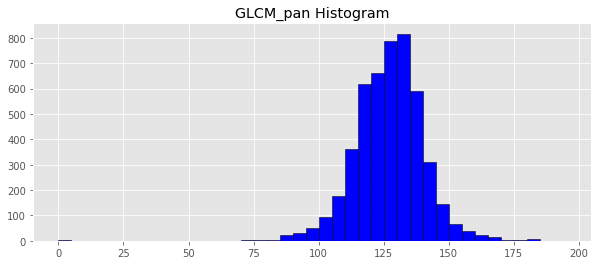

In [8]:
plt.figure(figsize=(10,4))
plt.hist(df['GLCM_pan'], bins=range(0,200,5), histtype='bar', ec='black', color='blue')
plt.title("GLCM_pan Histogram")
plt.show()

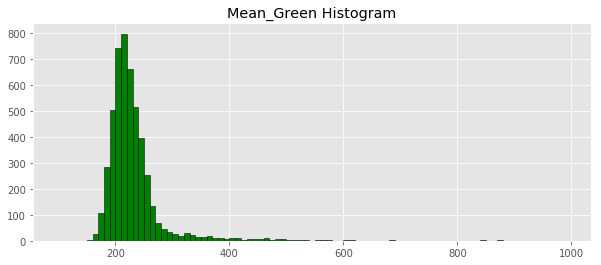

In [9]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_Green'], bins=range(100,1000,10), histtype='bar', ec='black', color='green') 
plt.title("Mean_Green Histogram")
plt.show()

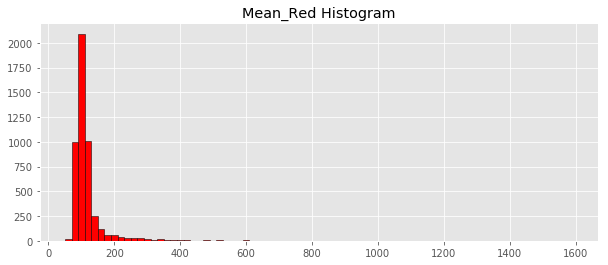

In [10]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_Red'], bins=range(50,1600,20), histtype='bar', ec='black', color='red')
plt.title("Mean_Red Histogram")
plt.show()

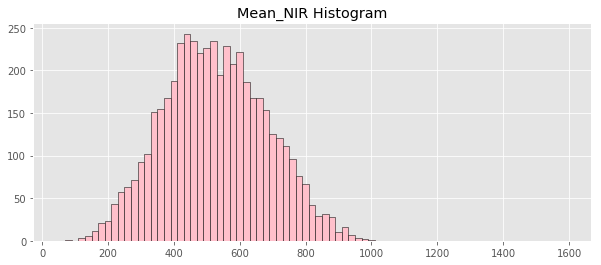

In [11]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_NIR'], bins=range(50,1600,20), histtype='bar', ec='black', color='pink')
plt.title("Mean_NIR Histogram")
plt.show()

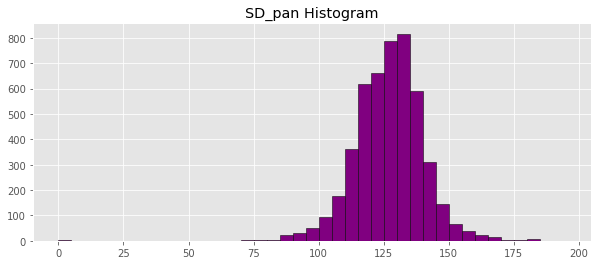

In [12]:
plt.figure(figsize=(10,4))
plt.hist(df['SD_pan'], bins=range(0,200,5), histtype='bar', ec='black', color='purple')
plt.title("SD_pan Histogram")
plt.show()